In [26]:
#Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('connect-4.csv')
data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [27]:
data.dtypes

a1       object
a2       object
a3       object
a4       object
a5       object
a6       object
b1       object
b2       object
b3       object
b4       object
b5       object
b6       object
c1       object
c2       object
c3       object
c4       object
c5       object
c6       object
d1       object
d2       object
d3       object
d4       object
d5       object
d6       object
e1       object
e2       object
e3       object
e4       object
e5       object
e6       object
f1       object
f2       object
f3       object
f4       object
f5       object
f6       object
g1       object
g2       object
g3       object
g4       object
g5       object
g6       object
class    object
dtype: object

In [28]:
data['class'].value_counts()

win     44473
loss    16635
draw     6449
Name: class, dtype: int64

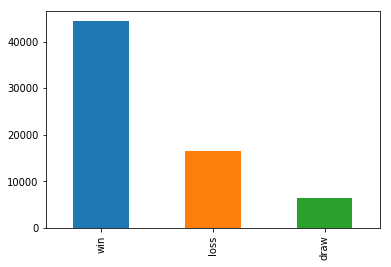

In [29]:
df=pd.DataFrame(data['class'])
df['class'].value_counts().plot.bar()

In [30]:
#Class Distribution
class1=data['class'].value_counts()[0]
class2=data['class'].value_counts()[1]
class3=data['class'].value_counts()[2]
print("outcome data contains {} win values".format(class1))
print("outcome data contains {} loss values".format(class2))
print("outcome data contains {} draw values".format(class3))

outcome data contains 44473 win values
outcome data contains 16635 loss values
outcome data contains 6449 draw values


In [31]:
outcome=pd.DataFrame(data['class'])
features=pd.DataFrame(data.drop(['class'],axis=1))

In [32]:
#Data PreProcessing
data.isnull().sum()

a1       0
a2       0
a3       0
a4       0
a5       0
a6       0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
d1       0
d2       0
d3       0
d4       0
d5       0
d6       0
e1       0
e2       0
e3       0
e4       0
e5       0
e6       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
g1       0
g2       0
g3       0
g4       0
g5       0
g6       0
class    0
dtype: int64

In [33]:
#One-hot-encoding
features=pd.get_dummies(features)
features.head()

,a1_b,a1_o,a1_x,a2_b,a2_o,a2_x,a3_b,a3_o,a3_x,a4_b,...,g3_x,g4_b,g4_o,g4_x,g5_b,g5_o,g5_x,g6_b,g6_o,g6_x
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [34]:
#Label Encoding
from sklearn import preprocessing 
lb=preprocessing.LabelEncoder()
outcome=pd.DataFrame(lb.fit_transform(outcome))
outcome.head()

C:\Users\Public\conda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,2
1,2
2,2
3,2
4,2


In [35]:
#Spliting Data into Training Sets and Testing Sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.3, random_state = 1)
print('training set size : '+str(X_train.shape[0]))
print('testing set size : '+str(X_test.shape[0]))

training set size : 47289
testing set size : 20268


In [36]:
#Benchmark Model(Initial model)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=42)
clf=clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print("Predictions for the testing data are {}:".format(pred))

C:\Users\Public\conda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predictions for the testing data are [2 2 2 ... 2 2 1]:


In [13]:
#Evaluation Metrics: Finding Accuracy Score and F1-score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy2=accuracy_score(y_test,pred)
fscore2=f1_score(y_test,pred,average='weighted')

print("Accuracy score for the model is {}".format(accuracy2))
print("fscore for the model is {}".format(fscore2))

Accuracy score for the model is 0.7593250444049734
fscore for the model is 0.7174875914524784


In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
print('predicted values for the data are {}:'.format(predicted))

C:\Users\Public\conda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


predicted values for the data are [2 1 2 ... 2 2 1]:


In [17]:
#metrics For Random Forest Classifier
accuracy1=accuracy_score(y_test,predicted)
fscore1=f1_score(y_test,predicted,average='weighted')

print("Accuracy Score for the random forest is: {}".format(accuracy1))
print("fscore for the random forest is: {}".format(fscore1))


Accuracy Score for the random forest is: 0.8030886125912768
fscore for the random forest is: 0.7855301981005498


In [18]:
#Hyper Paramater Optimization (Model Tuning)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score,accuracy_score
param_grid = {'n_estimators':[18],'min_impurity_split':[0.1],'warm_start':[True],'max_depth':[34],'max_features':[17],'min_samples_split':[3],'min_samples_leaf':[1]}
scorer = make_scorer(fbeta_score,average='weighted',beta=0.5,warm_start=True)
grid_obj =  GridSearchCV(model, param_grid=param_grid,cv=5)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)

C:\Users\Public\conda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Deprecatio

C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fi

C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packa

C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Public\conda\lib\site-packa

In [19]:
#Optimized Accuracy Score and F-score
accuracy=accuracy_score(y_test, best_predictions)
fscore=f1_score(y_test,best_predictions,average='weighted')

print("Optimized Accuracy Score for the model is : {}".format(accuracy))
print("Optimized Fscore for the model is : {}".format(fscore))

Optimized Accuracy Score for the model is : 0.8201598579040853
Optimized Fscore for the model is : 0.7952714108328685


In [20]:
#Best Parameters
grid_obj.best_params_

{'max_depth': 34,
 'max_features': 17,
 'min_impurity_split': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 18,
 'warm_start': True}

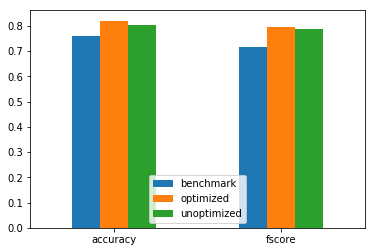

In [22]:
#Data Vizualization for the models.
benchmark=[accuracy2,fscore2]
unoptimized = [accuracy1,fscore1]
optimized = [accuracy,fscore]
index = ['accuracy','fscore']
df = pd.DataFrame({'benchmark':benchmark,'unoptimized': unoptimized,'optimized': optimized}, index=index)
df.plot.bar(rot=0)